![CO2 emissions](co2.png)

The energy sector involves intricate experiments to improve efficiency and sustainability. Proper experimental design helps to maximize insights and minimize errors. There are two common types of experimental design: factorial designs, which study multiple independent variables within a single experiment, and randomized block designs, which group experimental units to control variance. Understanding when to use each design is crucial for energy-related studies.

An environmental research team is investigating the impact of various fuel sources on CO2 emissions across different geographical regions. The goal is to understand which assigned fuel source contributes the most to CO2 emissions and whether this varies depending on location. The team has collected data from four distinct geographical regions: North, South, East, and West. In each region, multiple fuel sources—Natural Gas, Biofuel, and Coal—are used to generate energy. The resulting CO2 emissions are measured to evaluate the environmental impact of each fuel source.

As the data scientist on this project, you have access to two datasets, each representing data from one of the two mentioned experimental designs. The aim is to determine whether a factorial design or a randomized block design was used for the given experimental setup above and to analyze the dataset to identify key patterns and insights. 

In [40]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests

# Load datasets
energy_design_a = pd.read_csv("energy_design_a.csv")
energy_design_b = pd.read_csv("energy_design_b.csv")

Geographical_Region
East        (50.4975764792117, 7.046450528767474e-08)
North    (45.722317645356284, 1.4439335761931932e-07)
South     (15.29098339477534, 0.00015869217797857807)
West     (12.949717442117826, 0.00038280488933885705)
dtype: object
Bonferroni Corrected P-values: [2.97842303e-03 1.60405848e-05 1.51381089e-03 1.95958890e-02
 1.04206412e-02 3.71506293e-01 1.17998627e-03 6.31245443e-05
 6.41264547e-04 2.69611996e-02 4.30884019e-03 1.00000000e+00]


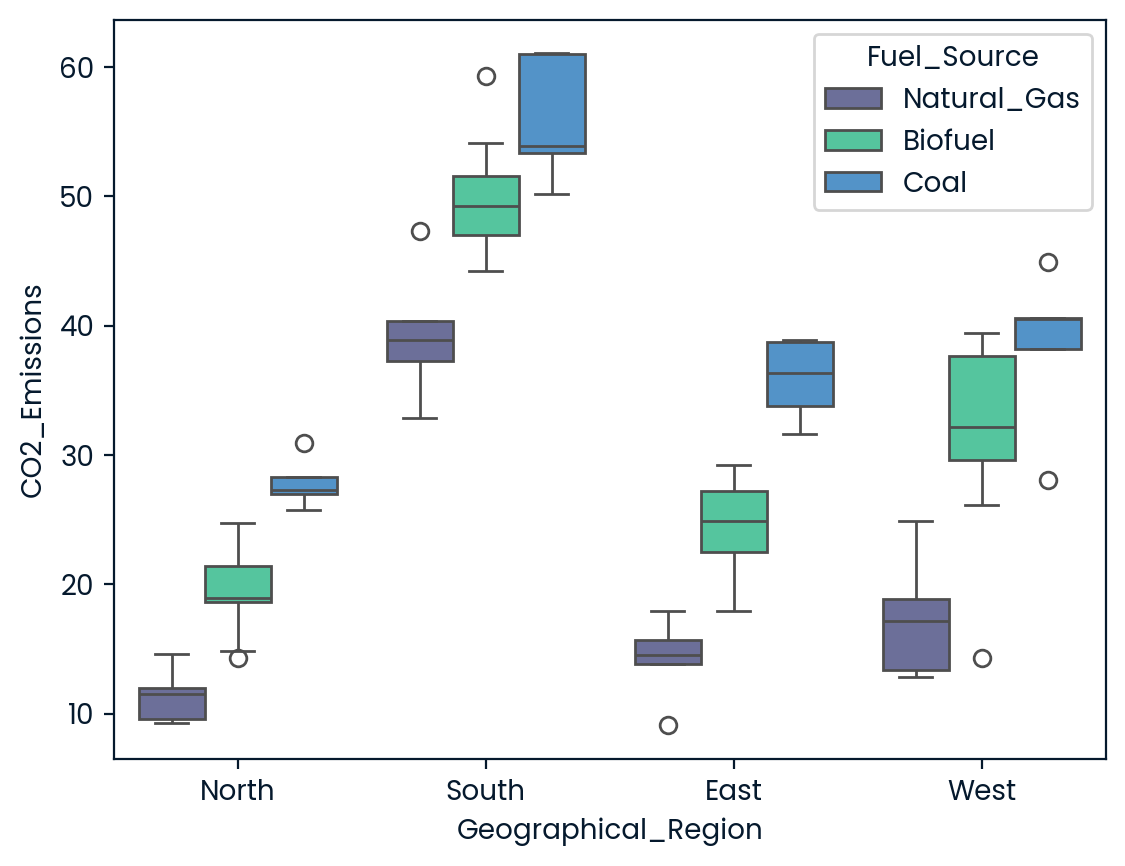

In [41]:
# Start coding here (use as many cells as you need)
energy_design_a.head()
energy_design_b.head()
design = "randomized_block"

sns.boxplot(data=energy_design_b, x="Geographical_Region", y="CO2_Emissions", hue="Fuel_Source")
highest_co2_region = "South"
highest_co2_source = "Coal"

test_results = energy_design_b.groupby("Geographical_Region").apply(lambda x:f_oneway(x[x["Fuel_Source"]=="Natural_Gas"]["CO2_Emissions"], x[x["Fuel_Source"]=="Biofuel"]["CO2_Emissions"], x[x["Fuel_Source"]=="Coal"]["CO2_Emissions"]))
                                                                    
print(test_results)

if any(result.pvalue <0.05 for result in test_results):
    pv = []
    for zone in ["North","South","East","West"]:
        fuels = ["Natural_Gas","Biofuel","Coal"]
        comp = [(fuels[i],fuels[j]) for i in range(len(fuels)) for j in range(i+1, len(fuels))]
        for f1, f2 in comp:
            g1 = energy_design_b[(energy_design_b["Geographical_Region"]==zone) & (energy_design_b["Fuel_Source"]==f1)]['CO2_Emissions']
            g2 = energy_design_b[(energy_design_b["Geographical_Region"]==zone) & (energy_design_b["Fuel_Source"]==f2)]['CO2_Emissions']
            _,pval = ttest_ind(g1,g2)
            pv.append(pval)
            
diff_results = multipletests(pv, alpha=0.05, method="bonferroni")   
print("Bonferroni Corrected P-values:", diff_results[1])
